<a href="https://colab.research.google.com/github/vini-queiroz/python_data_science/blob/main/Aula_10_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

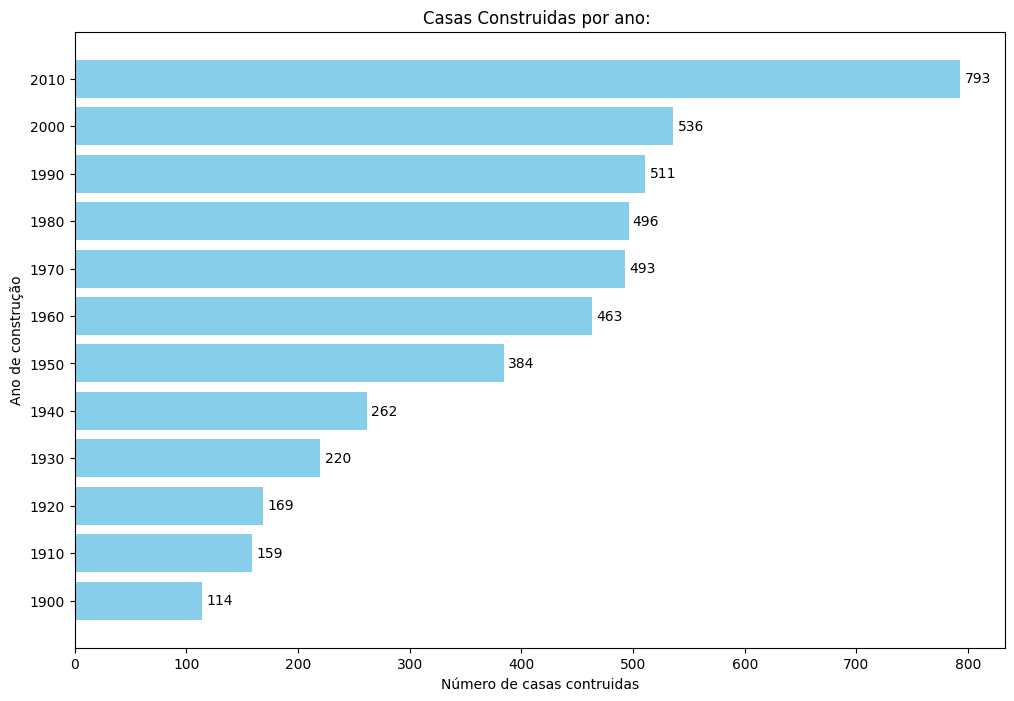

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv('/content/data.csv')

df.rename(columns={'date':'Data', 'price':'Preco', 'bedrooms':'Quartos', 'bathrooms':'Banheiros', 'sqft_living':'Area_util', 'sqft_lot':'Area_lote',
                   'floors':'Andares', 'waterfront':'Frente_para_agua', 'view':'Vista', 'condition':'Condicao', 'sqft_above':'Area_acima', 'sqft_basement':'Area_porao',
                   'yr_built':'Ano_construcao', 'yr_renovated':'Ano_reforma', 'street':'Rua', 'city':'Cidade', 'statezip':'Estado_cep', 'country':'Pais'}, inplace=True)

# Normalizando as datas...
df['Data'] = pd.to_datetime(df['Data'], format = 'mixed')

# Grafico que mostre a quantidade de casas contruidas por periodos de 5 anos

# Cria uma coluna que faz a divisão inteira do ano de contrução por 5 e multiplica por 5 para retornar datas a cada 5 anos
df['Periodo'] = (df['Ano_construcao']// 10) * 10

# Logo após conta quantas casas foram contruidas por periodo...
casas_por_periodo = df.groupby('Periodo')['Periodo'].count()
casas_por_periodo_ordenado = casas_por_periodo.sort_values(ascending=True)

# Cria a figura e o eixo...
ig, ax = plt.subplots(figsize=(12,8))

# Plota o gráfico e guarda as barras (objeto BarContainer) para que tenhamos os rotulos dos dados...
barras = ax.barh(
    casas_por_periodo_ordenado.sort_index().index.astype(str),
    casas_por_periodo_ordenado.values,
    color= 'skyblue'
)

# Adiciona os titulos do gráfico e dos eixos...
plt.title('Casas Construidas por ano: ')
plt.xlabel('Número de casas contruidas')
plt.ylabel('Ano de construção')

# Adiciona o rotulo numérico as barras...
ax.bar_label(barras, fmt='%d', padding=3)

plt.show()

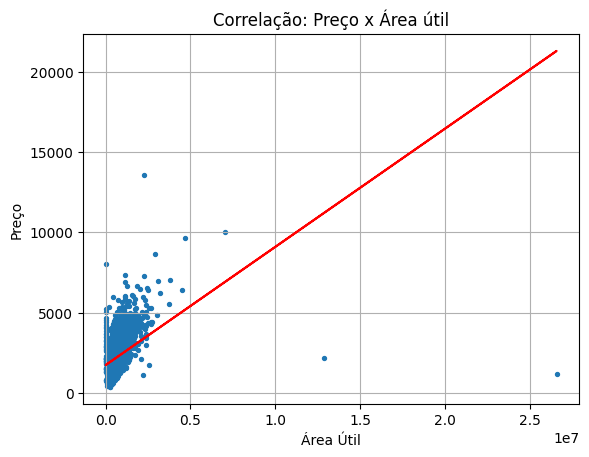

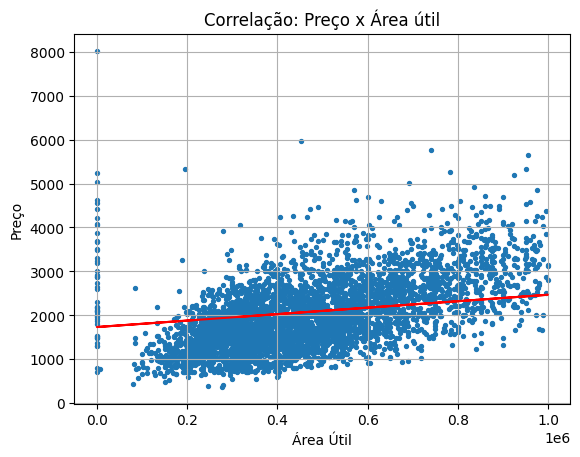

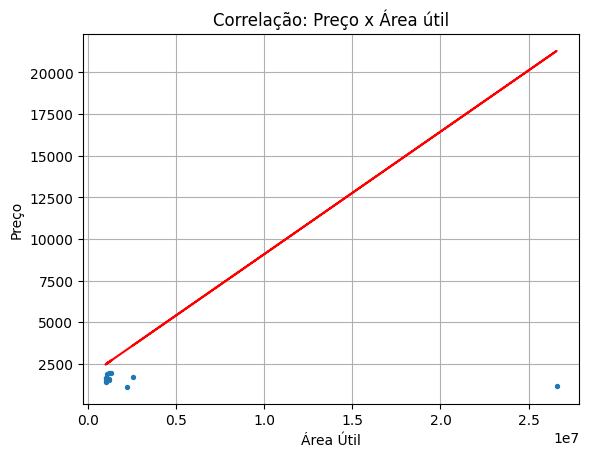

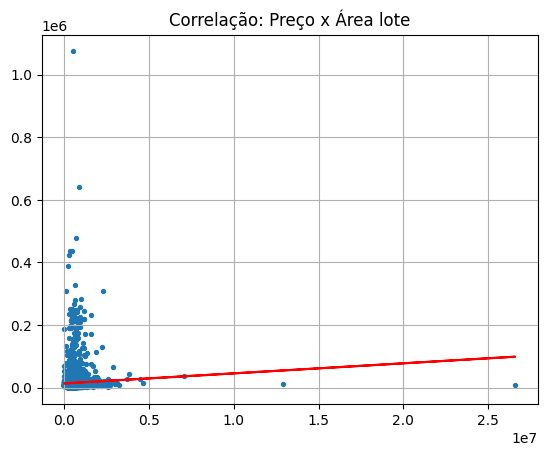

In [11]:
import scipy.stats as stats

# Exemplo de regressão linear...

slope, intercept, r, p, std_err = stats.linregress(df['Preco'], df['Area_util'])

def myfunc(preco):
  return slope * preco + intercept

mymodel = list(map(myfunc, df['Preco']))

plt.scatter(df['Preco'], df['Area_util'], s=8)
plt.plot(df['Preco'], mymodel, color='red')
plt.grid(True)
plt.title('Correlação: Preço x Área útil')
plt.xlabel('Área Útil')
plt.ylabel('Preço')
plt.show()

print('\n')

# Iremos fazer uma versão sem os outliers

df_filtrado = df[df['Preco'] < 1000000]

mymodel = list(map(myfunc, df_filtrado['Preco']))

plt.scatter(df_filtrado['Preco'], df_filtrado['Area_util'], s=8)
plt.plot(df_filtrado['Preco'], mymodel, color='red')
plt.grid(True)
plt.title('Correlação: Preço x Área útil')
plt.xlabel('Área Útil')
plt.ylabel('Preço')
plt.show()

print('\n')


# Iremos fazer uma versão apenas com os outliers

df_filtrado = df[(df['Preco'] > 1000000) & (df['Area_util'] < 2000)]

mymodel = list(map(myfunc, df_filtrado['Preco']))

plt.scatter(df_filtrado['Preco'], df_filtrado['Area_util'], s=8)
plt.plot(df_filtrado['Preco'], mymodel, color='red')
plt.grid(True)
plt.title('Correlação: Preço x Área útil')
plt.xlabel('Área Útil')
plt.ylabel('Preço')
plt.show()

print('\n')

slope, intercept, r, p, std_err = stats.linregress(df['Preco'], df['Area_lote'])

mymodel = list(map(myfunc, df['Preco']))


plt.scatter(df['Preco'], df['Area_lote'], s=8)
plt.grid(True)
plt.plot(df['Preco'], mymodel, color='red')
plt.title('Correlação: Preço x Área lote')
plt.show()



Text(0.5, 1.0, 'Matriz de correlação de variáveis')

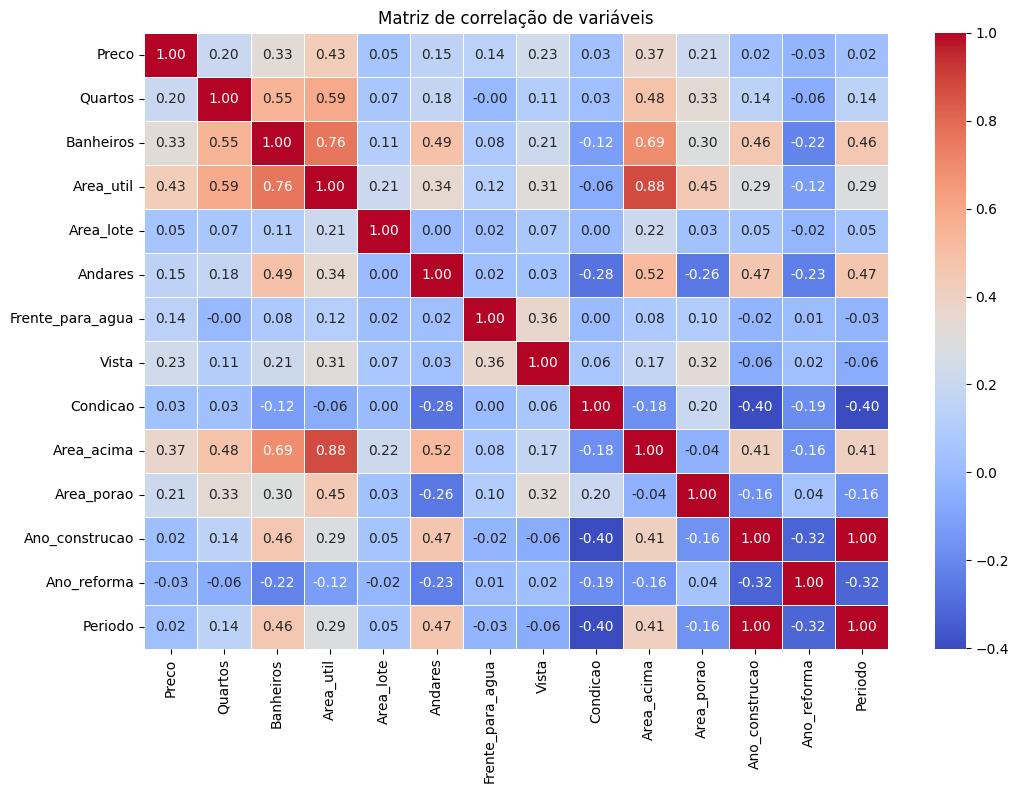

In [12]:
# Mapa de correlação entre as variáveis
correlacao = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlação de variáveis')

<Axes: >

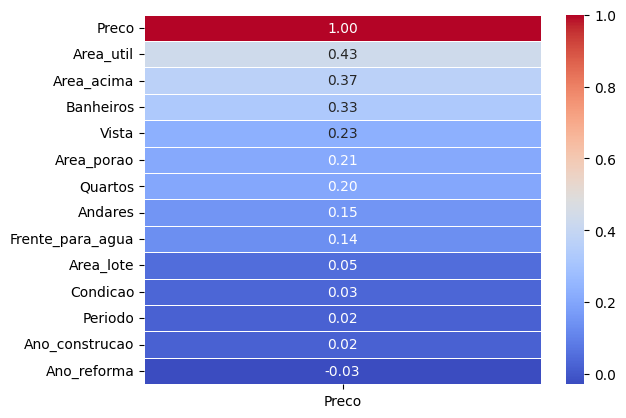

In [13]:
correlacao_preco = correlacao['Preco'].sort_values(ascending=False)

sns.heatmap(correlacao_preco.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#print(correlacao_preco)

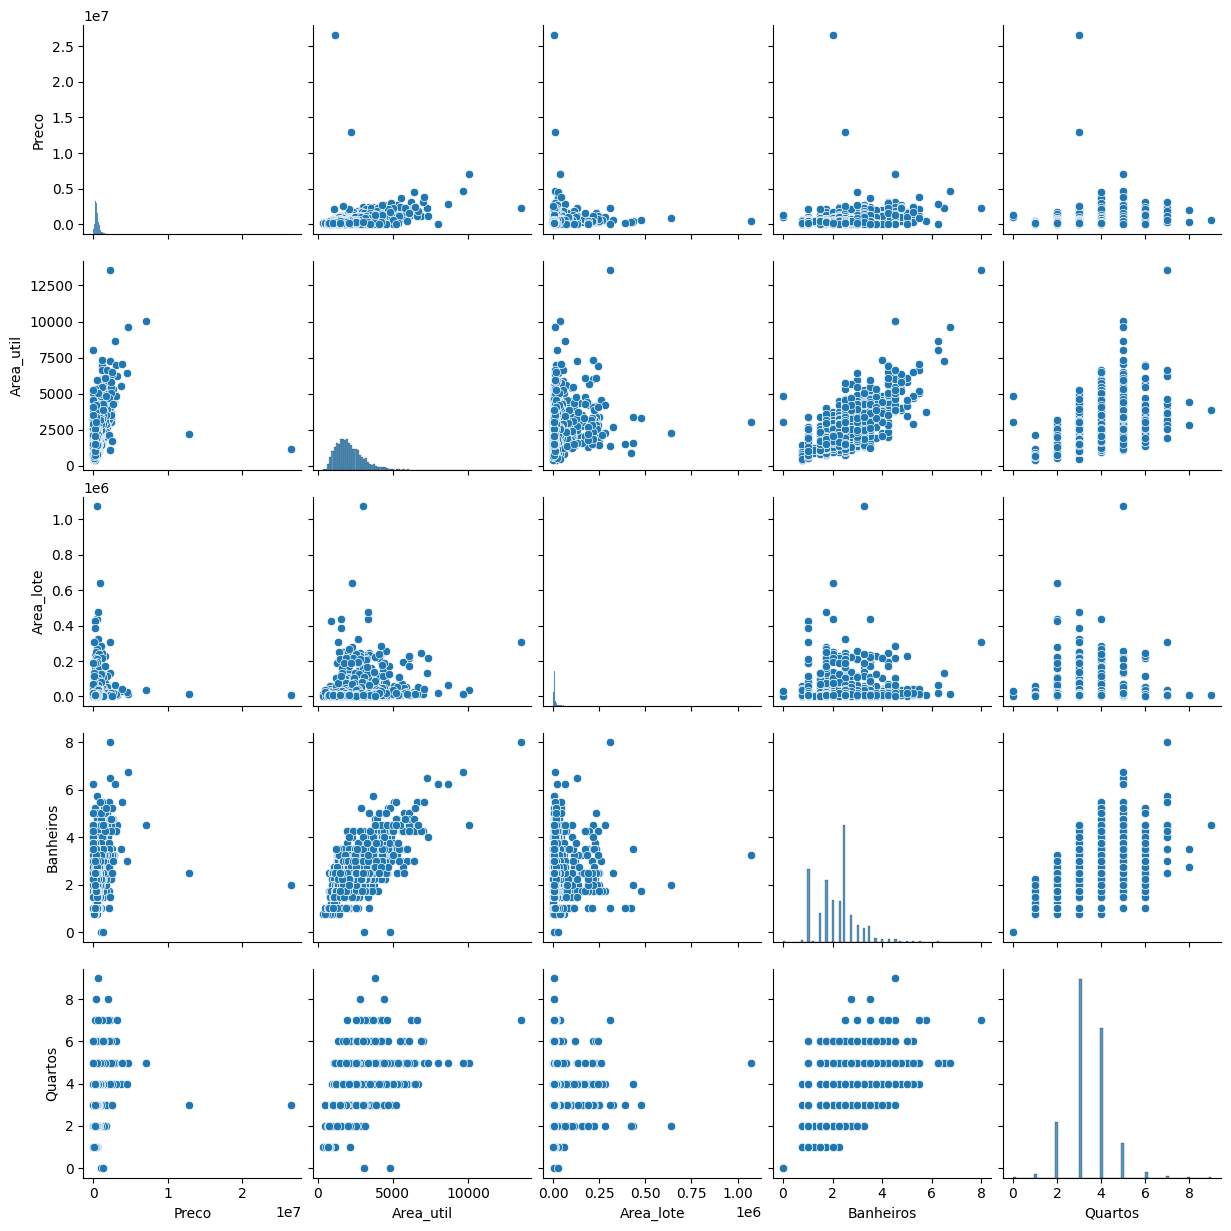

In [14]:
sns.pairplot(df[['Preco', 'Area_util', 'Area_lote', 'Banheiros', 'Quartos']])
plt.show()

In [15]:
df.head()

,Data,Preco,Quartos,Banheiros,Area_util,Area_lote,Andares,Frente_para_agua,Vista,Condicao,Area_acima,Area_porao,Ano_construcao,Ano_reforma,Rua,Cidade,Estado_cep,Pais,Periodo
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,1950
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,1920
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,1960
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,1960
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,1970


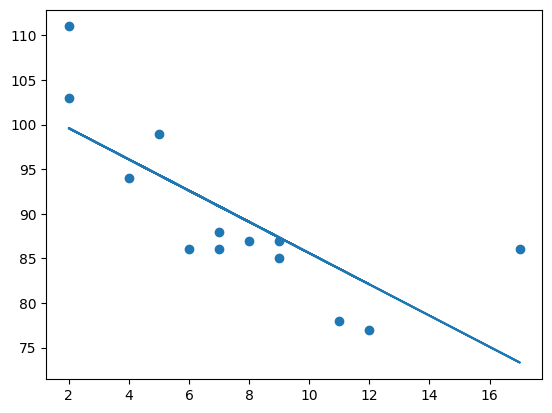

In [16]:
import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()